In [1]:
import sys, platform, os
import numpy as np
from scipy.stats import chisquare

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Obteniendo los valores de los parámetros

<Figure size 432x288 with 0 Axes>

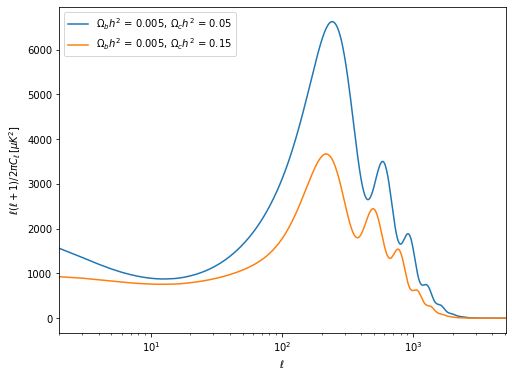

<Figure size 432x288 with 0 Axes>

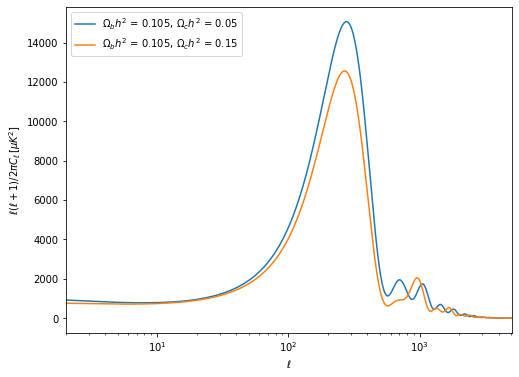

<Figure size 432x288 with 0 Axes>

In [37]:
ombh2s = np.linspace(0.005, 0.105, 2)
omch2s = np.linspace(0.050, 0.150, 2)

fig = plt.figure()
#ax = fig.add_subplot(111)
for ombh2 in ombh2s:
    ombh2 = ombh2
    #print(ombh2)
    fig, ax = plt.subplots(1,1, figsize=(8,6), squeeze=False)
    
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculate results for these parameters
        results = camb.get_results(pars)
        #print(omch2)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        ax[0,0].plot(ls, unlensedCL[:,0], label='$\\Omega_b h^2$ = {ombh2}, $\\Omega_c h^2 $ = {omch2}'.format(ombh2=ombh2,omch2=omch2))
        plt.legend(loc='best')
        plt.xscale('log')
        plt.xlabel('$\ell$')
        plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
        #f = open( 'csv_file.csv', 'wb' )
        #f.write(ls)
        #f.close()
    for ax in ax.reshape(-1): ax.set_xlim([2,5050]);
    plt.show()
    plt.savefig("Graph" + str(ombh2) + "," + str(omch2) +".png", format="PNG")
    


#plt.savefig('spectrum_original2.png')
